In [1]:
from hossam import load_data
from pandas import crosstab

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('score')
origin.head()

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A


In [4]:
df=origin.astype({'gender':'category', 'score':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


In [5]:
df.describe(include='category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


In [6]:
for c in df.columns:
    print('***',c,'***')
    print(df[c].value_counts())

*** gender ***
gender
M    4
W    4
Name: count, dtype: int64
*** score ***
score
B    3
C    3
A    2
Name: count, dtype: int64


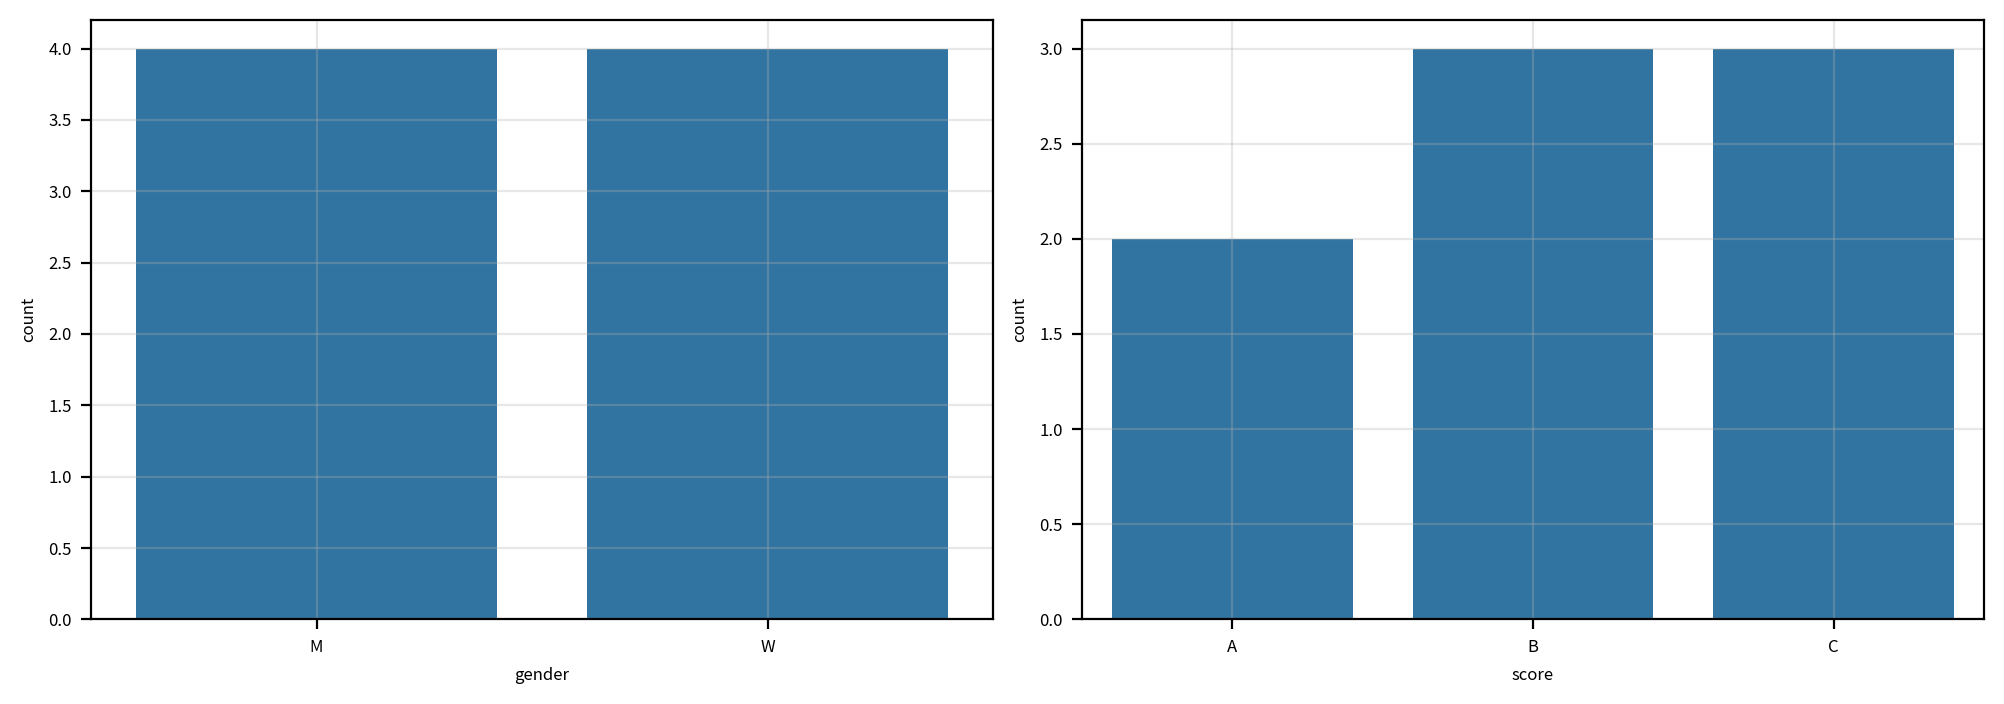

In [7]:
width_px=2000
height_px=700
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig,ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(df.columns):
    sb.countplot(data=df, x=v, ax=ax[i])
    ax[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [9]:
cb1=crosstab(index=df['gender'], columns=df['score'], rownames=['성별'], colnames=['점수'])
cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


In [10]:
cb2=crosstab(index=origin['gender'], columns=origin['score'], rownames=['성별'], colnames=['점수'], margins=True, normalize=True)
cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


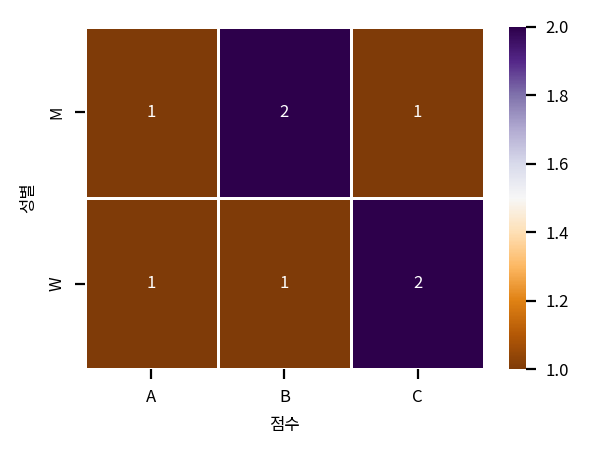

In [12]:
width_px=600
height_px=450
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig,ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.heatmap(data=cb1, annot=True, fmt='d', linewidth=0.5, cmap='PuOr')

plt.tight_layout()
plt.show()
plt.close()